In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [38]:
barcolor = ['olivedrab', 'lightsteelblue', 'steelblue', 'gold', 'pink' ]
legend = ["ILP", "Greedy", 'DQN', 'TD3', 'DDPG']

In [3]:
thres = 50

# Set A

In [4]:
#==========================================Read Data
data = pd.read_csv(f'allocation_results/allocation_for_server50_thres{thres}.csv')
#data['ilp_qoe'] = data['ilp_qoe'].abs() #few results are actually positive but showing negetive
data

,user,server,ilp_user,ilp_time,greedy_user,greedy_time,dqn_user,dqn_time,td3_user,td3_time,ddpg_user,ddpg_time
0,100.0,50.0,79.0,0.277916,79.0,0.014201,79.0,0.009815,79.0,0.011900,79.0,0.009985
1,100.0,50.0,81.0,0.114587,81.0,0.016471,81.0,0.010226,81.0,0.012035,81.0,0.012636
2,100.0,50.0,76.0,0.112707,76.0,0.013562,76.0,0.009957,76.0,0.010985,76.0,0.011405
3,100.0,50.0,84.0,0.126902,84.0,0.014713,84.0,0.009828,84.0,0.011464,84.0,0.011461
4,100.0,50.0,79.0,0.129427,79.0,0.013858,79.0,0.010313,79.0,0.011268,79.0,0.009982
5,100.0,50.0,84.0,0.127774,84.0,0.016288,84.0,0.009679,84.0,0.013544,84.0,0.012570
6,100.0,50.0,86.0,0.121472,86.0,0.014672,86.0,0.010007,86.0,0.010457,86.0,0.010391
7,100.0,50.0,92.0,0.185548,92.0,0.016138,92.0,0.009829,92.0,0.012175,92.0,0.011733
8,100.0,50.0,80.0,0.133643,80.0,0.014217,80.0,0.010138,80.0,0.010625,80.0,0.009641
9,100.0,50.0,77.0,0.117647,77.0,0.015569,77.0,0.009783,77.0,0.010933,77.0,0.009808


In [5]:
# user_data = data.groupby(['user', 'server'])
user_data = data.groupby('server') #switch between user or server parameter
num_user = user_data.mean()[['ilp_user', 'greedy_user', 'dqn_user', 'td3_user','ddpg_user']]
num_user.index = num_user.index.astype(int) #change index to integer
time = user_data.mean()[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']]
time.index = time.index.astype(int)

In [6]:
#compute the log of time for plotting
time[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']] = time[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']].applymap(lambda x: math.log10(100*x))

In [7]:
num_user

,ilp_user,greedy_user,dqn_user,td3_user,ddpg_user
server,,,,,
50,237.92,229.96,245.9,245.9,245.9


In [8]:
time

,ilp_time,greedy_time,dqn_time,td3_time,ddpg_time
server,,,,,
50,2.154246,0.656769,0.038202,0.105253,0.083571


In [9]:
#  (num_user['rl_lin_user'] - num_user['ilp_user'])

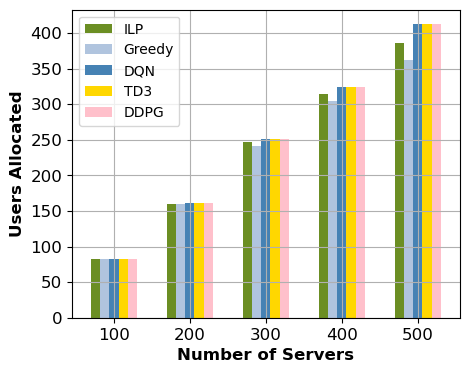

In [39]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")

# ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(legend, fontsize=10, loc='upper left')
ax.grid(True)
plt.xticks(rotation=0)

fig.set_figwidth(5)
fig.set_figheight(4)


fig.savefig(f"plots/alloc_user_s50_t{thres}.pdf",dpi=100, bbox_inches = "tight")

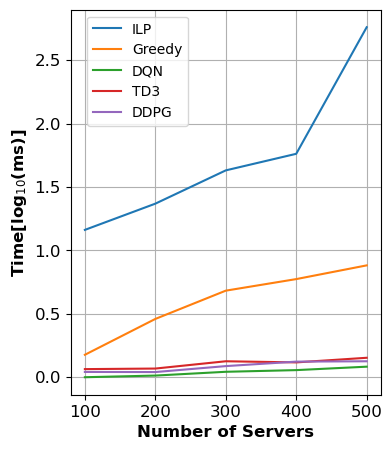

In [25]:
fig1, ax1 = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size


plt.locator_params(axis='x', nbins=5)
ax1.plot( 'ilp_time', data=time)
ax1.plot( 'greedy_time', data=time)
ax1.plot( 'dqn_time', data=time)
ax1.plot( 'td3_time', data=time)
ax1.plot( 'ddpg_time', data=time)

# ax1.plot( 'rl_exp_time', data=time, marker='^', linewidth=2, markersize=6,zorder=4, color=barcolor[3])


ax1.set_ylabel('Time[log$_{10}$(ms)]', fontsize=12, fontweight="bold")
# ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax1.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")

ax1.tick_params(axis='both', labelsize=12)
ax1.legend(legend, loc='upper right', bbox_to_anchor=(0.4, 1))
ax1.grid(True)
plt.xticks(rotation = 0)

fig1.set_figwidth(4)
fig1.set_figheight(5)

# fig1.savefig(f"plots/alloc_time_u500_t{thres}.pdf",dpi=100, bbox_inches = "tight")

# Set B

In [26]:
#==========================================Read Data
data = pd.read_csv(f'allocation_results/allocation_for_server50_thres{thres}.csv')
#data['ilp_qoe'] = data['ilp_qoe'].abs() #few results are actually positive but showing negetive
data

,user,server,ilp_user,ilp_time,greedy_user,greedy_time,dqn_user,dqn_time,td3_user,td3_time,ddpg_user,ddpg_time
0,100.0,50.0,79.0,0.277916,79.0,0.014201,79.0,0.009815,79.0,0.011900,79.0,0.009985
1,100.0,50.0,81.0,0.114587,81.0,0.016471,81.0,0.010226,81.0,0.012035,81.0,0.012636
2,100.0,50.0,76.0,0.112707,76.0,0.013562,76.0,0.009957,76.0,0.010985,76.0,0.011405
3,100.0,50.0,84.0,0.126902,84.0,0.014713,84.0,0.009828,84.0,0.011464,84.0,0.011461
4,100.0,50.0,79.0,0.129427,79.0,0.013858,79.0,0.010313,79.0,0.011268,79.0,0.009982
5,100.0,50.0,84.0,0.127774,84.0,0.016288,84.0,0.009679,84.0,0.013544,84.0,0.012570
6,100.0,50.0,86.0,0.121472,86.0,0.014672,86.0,0.010007,86.0,0.010457,86.0,0.010391
7,100.0,50.0,92.0,0.185548,92.0,0.016138,92.0,0.009829,92.0,0.012175,92.0,0.011733
8,100.0,50.0,80.0,0.133643,80.0,0.014217,80.0,0.010138,80.0,0.010625,80.0,0.009641
9,100.0,50.0,77.0,0.117647,77.0,0.015569,77.0,0.009783,77.0,0.010933,77.0,0.009808


In [27]:
# user_data = data.groupby(['user', 'server'])
user_data = data.groupby('user') #switch between user or server parameter
num_user = user_data.mean()[['ilp_user', 'greedy_user', 'dqn_user', 'td3_user','ddpg_user']]
num_user.index = num_user.index.astype(int)
time = user_data.mean()[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']]
time.index = time.index.astype(int)

In [28]:
#compute the log of time for plotting
time[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']] = time[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']].applymap(lambda x: math.log10(100*x))

In [29]:
#  (num_user['rl_lin_user'] - num_user['ilp_user'])

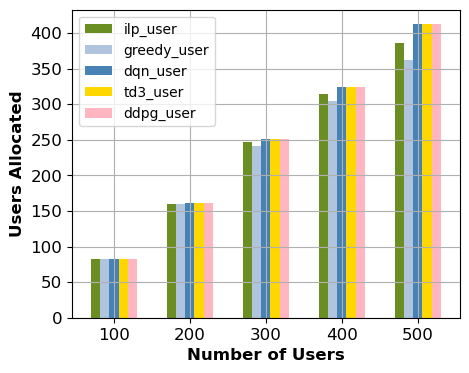

In [30]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")

# ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=0)


fig.set_figwidth(5)
fig.set_figheight(4)

fig.savefig(f"plots/alloc_user_s50_t{thres}.pdf",dpi=100, bbox_inches = "tight")

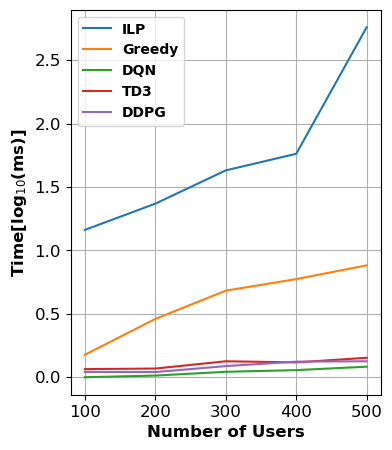

In [31]:
fig1, ax1 = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size


plt.locator_params(axis='x', nbins=5)
ax1.plot( 'ilp_time', data=time)
ax1.plot( 'greedy_time', data=time)
ax1.plot( 'dqn_time', data=time)
ax1.plot( 'td3_time', data=time)
ax1.plot( 'ddpg_time', data=time)

ax1.set_ylabel('Time[log$_{10}$(ms)]', fontsize=12, fontweight="bold")
# ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")

ax1.tick_params(axis='both', labelsize=12)
ax1.legend(legend, loc='upper left', bbox_to_anchor=(0, 1), prop = {'weight':'bold', 'size':  10})
ax1.grid(True)
plt.xticks(rotation = 0)

fig1.set_figwidth(4)
fig1.set_figheight(5)

# fig1.savefig(f"plots/alloc_time_s50_t{thres}.pdf",dpi=100, bbox_inches = "tight")